# Lab 1 - Exploratory Data Analysis
## CAP 5771 - Principles of Data Mining

-  Poonam Gupta

## Instructions

Please complete this lab assignment. Follow along carefully and answer all questions. Coding tasks should be coded inline within the jupyter notebook. No additional files are need or accepted unless otherwise noted. All data files can be found in the data folder on the github repo. Please read the contents of each section, as well as the comments in each cell. Add your code where it says 'Insert your code here'. Also, please be sure to answer any questions inline in markdown.

## Objectives

6000 "best books" were downloaded and assembled into a csv file. check out the  [Goodreads](https://goodreads.com). The "rating" of each book came is calculated by Goodreads and posted on their website. The csv file contains data for each book, including the book rating. The objective of this this lab is to clean and further parse the data. Then, you will do some exploratory data analysis to answer questions about these best books and popular genres.

By the end of this lab, you should be able to:

1. Load a dataset and address missing values
2. Parse columns in the dataframe to create new dataframe columns
3. Create and interpret visualizations to explore the data set

## Basic Exploratory Data Analysis (EDA) Workflow

The basic EDA workflow is as follows:

1. **Build** a DataFrame from the data
2. **Clean** the DataFrame with the following properites:
    - Each row describes a single object
    - Each column describes a property or feature of that object
    - Columns are numeric whenever appropriate (easier to work with)
    - Object properties are atomic that cannot be further decomposed
3. Explore global properties using histograms, scatter plots, and aggregation functions to summarize the data.
4. Explore group properties using groupby and small multiples to compare subsets of the data.

This process transforms the data into a format which is easier to work with, gives a basic overview of the data's properties, and likely generates several questions for you to followup in subsequent analysis.

## Data loading and cleaning

In order to process the data, you must load the data from the csv file, [goodreads.csv](). If you've cloned this repository, the data is located in a folder called data, located in the Labs folder of the repository. Otherwise, make sure that you download the file and load it with the appropriate path.

Your task for this part is to load the data into a pandas dataframe and resolve any issues related to the loading of the data. Report any issues encountered during loading.

You'll need the following libraries imported.

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# some tweaks to the default options in pandas
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)

### Loading the data into a dataframe

The first step is to load the data into the dataframe from the csv file. Go ahead and try loading it. If you load the data as is, do you notice any issues about the data? You can try exploring the raw data file in another program such as excel or your favorite text editor to see what's going on.

In [2]:
#Read the data into a dataframe
df = pd.read_csv("C:\\Users\\poonam\\Desktop\\FIU\\2020 Spring\\Data Mining\\Lab work\\goodreads.csv",header= None)

# Print out the first couple of rows of the dataframe
####### 
#   Insert your code
df[:5]
# We can use either df[:5] or df.head() which defaults to first 5.
#df.head()
#######

,0,1,2,3,4,5,6,7,8,9
0,4.40,136455,0439023483,good_reads:book,https://www.goodreads.com/author/show/153394.S...,2008.0,/genres/young-adult|/genres/science-fiction|/g...,dir01/2767052-the-hunger-games.html,2958974,"The Hunger Games (The Hunger Games, #1)"
1,4.41,16648,0439358078,good_reads:book,https://www.goodreads.com/author/show/1077326....,2003.0,/genres/fantasy|/genres/young-adult|/genres/fi...,dir01/2.Harry_Potter_and_the_Order_of_the_Phoe...,1284478,Harry Potter and the Order of the Phoenix (Har...
2,3.56,85746,0316015849,good_reads:book,https://www.goodreads.com/author/show/941441.S...,2005.0,/genres/young-adult|/genres/fantasy|/genres/ro...,dir01/41865.Twilight.html,2579564,"Twilight (Twilight, #1)"
3,4.23,47906,0061120081,good_reads:book,https://www.goodreads.com/author/show/1825.Har...,1960.0,/genres/classics|/genres/fiction|/genres/histo...,dir01/2657.To_Kill_a_Mockingbird.html,2078123,To Kill a Mockingbird
4,4.23,34772,0679783261,good_reads:book,https://www.goodreads.com/author/show/1265.Jan...,1813.0,/genres/classics|/genres/fiction|/genres/roman...,dir01/1885.Pride_and_Prejudice.html,1388992,Pride and Prejudice


### Issues in data

There are two rows without any data except one column (dir).

***Observation***

The year column also have negative numbers in year. This is not an issue but need to be aware. 

Now go ahead and read the csv file, adding the appropriate column headings described above.

In [3]:
df=pd.read_csv("C:\\Users\\poonam\\Desktop\\FIU\\2020 Spring\\Data Mining\\Lab work\\goodreads.csv", header=None, names=['rating',
                                                           'review_count',
                                                           'isbn',
                                                           'booktype',
                                                           'author_url',
                                                           'year',
                                                           'genre_urls',
                                                           'dir',
                                                           'rating_count',
                                                           'name'])

# Print out the first couple of rows of the dataframe
####### 
#   Insert your code
df[:5]
#######

,rating,review_count,isbn,booktype,author_url,year,genre_urls,dir,rating_count,name
0,4.40,136455,0439023483,good_reads:book,https://www.goodreads.com/author/show/153394.S...,2008.0,/genres/young-adult|/genres/science-fiction|/g...,dir01/2767052-the-hunger-games.html,2958974,"The Hunger Games (The Hunger Games, #1)"
1,4.41,16648,0439358078,good_reads:book,https://www.goodreads.com/author/show/1077326....,2003.0,/genres/fantasy|/genres/young-adult|/genres/fi...,dir01/2.Harry_Potter_and_the_Order_of_the_Phoe...,1284478,Harry Potter and the Order of the Phoenix (Har...
2,3.56,85746,0316015849,good_reads:book,https://www.goodreads.com/author/show/941441.S...,2005.0,/genres/young-adult|/genres/fantasy|/genres/ro...,dir01/41865.Twilight.html,2579564,"Twilight (Twilight, #1)"
3,4.23,47906,0061120081,good_reads:book,https://www.goodreads.com/author/show/1825.Har...,1960.0,/genres/classics|/genres/fiction|/genres/histo...,dir01/2657.To_Kill_a_Mockingbird.html,2078123,To Kill a Mockingbird
4,4.23,34772,0679783261,good_reads:book,https://www.goodreads.com/author/show/1265.Jan...,1813.0,/genres/classics|/genres/fiction|/genres/roman...,dir01/1885.Pride_and_Prejudice.html,1388992,Pride and Prejudice


### Quick checks

It's always a good idea to examine the data before doing any further preprocessing or analysis.

In [4]:
# Check the column data types
####### 
#   Insert your code
df.dtypes
#######

rating          float64
review_count     object
isbn             object
booktype         object
author_url       object
year            float64
genre_urls       object
dir              object
rating_count     object
name             object
dtype: object

What else should be checked? Research other important checks to make on the dataset before moving on.

### Additional checks###

We can use DataFrame.info() and DataFrame.describe() to learn more about the structure as well as data in the dataset. 

In [5]:
# Check a few more properties of the dataset before moving on
####### 
#   Insert your code
# Prints summary of a DataFrame - including index data types, column data types and their non-null counts
df.info()
# Prints descriptive statistics. Generally includes count, mean, minimum and maximum values among other details for 
# numeric values. We can set 'include' parameter to 'all' to get additional details around non-numeric data.
df.describe(include='all')
#df.describe()
####### 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 10 columns):
rating          5998 non-null float64
review_count    6000 non-null object
isbn            5525 non-null object
booktype        6000 non-null object
author_url      6000 non-null object
year            5993 non-null float64
genre_urls      5938 non-null object
dir             6000 non-null object
rating_count    6000 non-null object
name            6000 non-null object
dtypes: float64(2), object(8)
memory usage: 468.8+ KB


,rating,review_count,isbn,booktype,author_url,year,genre_urls,dir,rating_count,name
count,5998.000000,6000,5525,6000,6000,5993.000000,5938,6000,6000,6000
unique,NaN,3105,5524,2,2679,NaN,5776,6000,5628,5962
top,NaN,8,None,good_reads:book,https://www.goodreads.com/author/show/3389.Ste...,NaN,/genres/fiction,dir25/6371117-betrayals.html,14,Holy Bible
freq,NaN,14,2,5998,56,NaN,8,1,7,6
mean,4.042201,NaN,NaN,NaN,NaN,1969.085099,NaN,NaN,NaN,NaN
std,0.260661,NaN,NaN,NaN,NaN,185.383169,NaN,NaN,NaN,NaN
min,2.000000,NaN,NaN,NaN,NaN,-1500.000000,NaN,NaN,NaN,NaN
25%,3.870000,NaN,NaN,NaN,NaN,1980.000000,NaN,NaN,NaN,NaN
50%,4.050000,NaN,NaN,NaN,NaN,2002.000000,NaN,NaN,NaN,NaN
75%,4.210000,NaN,NaN,NaN,NaN,2009.000000,NaN,NaN,NaN,NaN


### Examining a bit further

Many times, we need to examine the data further before moving on. One thing that's always important to check is to make sure that the data does not have any missing values.



In [52]:
####### 
#   Insert your code
# Checking if there are any null values in the dataset. 
df.isnull().values.any()

False

Was the data read correctly? Were the values represented properly, as expected?

Yes, the data was read correctly. However there are number of values which are Null. 
There are also values in Column 'Year') that should not be set to a float. 

### Examining a bit further

Many times, we need to examine the data further before moving on. Sure checking the properties of the dataset are important, as is checking the first $n$ rows. But one thing that's always important to check is to make sure that the data does not have any missing values.

In [7]:
# Check to see how many missing values there are in the dataframe
####### 
#   Insert your code
df.isnull().sum().sum()
#######

546

In [8]:
# Now, locate where the missing values occur
####### 
#   Insert your code
df.isnull().sum()
####### 

rating            2
review_count      0
isbn            475
booktype          0
author_url        0
year              7
genre_urls       62
dir               0
rating_count      0
name              0
dtype: int64

The data above tells us that there a few columns (rating, isbn, year, genre_urls) that we should review further. After reviewing, we found rating, year to be more relevant. 

In [9]:
df[df['rating'].isna()]

,rating,review_count,isbn,booktype,author_url,year,genre_urls,dir,rating_count,name
3643,NaN,None,None,None,None,NaN,NaN,dir37/9658936-harry-potter.html,None,None
5282,NaN,None,None,None,None,NaN,NaN,dir53/113138.The_Winner.html,None,None


This shows us that there are two rows that have no usable data. These would be good candidates for deletion.

In [10]:
#### Review the null data for 'year' column
df[df['year'].isna()]

,rating,review_count,isbn,booktype,author_url,year,genre_urls,dir,rating_count,name
2442,4.23,526,NaN,good_reads:book,https://www.goodreads.com/author/show/623606.A...,NaN,/genres/religion|/genres/islam|/genres/non-fic...,dir25/1301625.La_Tahzan.html,4134,La Tahzan
2869,4.61,2,NaN,good_reads:book,https://www.goodreads.com/author/show/8182217....,NaN,NaN,dir29/22031070-my-death-experiences---a-preach...,23,My Death Experiences - A Preacherâs 18 Apoca...
3643,NaN,None,None,None,None,NaN,NaN,dir37/9658936-harry-potter.html,None,None
5282,NaN,None,None,None,None,NaN,NaN,dir53/113138.The_Winner.html,None,None
5572,3.71,35,8423336603,good_reads:book,https://www.goodreads.com/author/show/285658.E...,NaN,/genres/fiction,dir56/890680._rase_una_vez_el_amor_pero_tuve_q...,403,Ãrase una vez el amor pero tuve que matarlo. ...
5658,4.32,44,NaN,good_reads:book,https://www.goodreads.com/author/show/25307.Ro...,NaN,/genres/fantasy|/genres/fantasy|/genres/epic-f...,dir57/5533041-assassin-s-apprentice-royal-assa...,3850,Assassin's Apprentice / Royal Assassin (Farsee...
5683,4.56,204,NaN,good_reads:book,https://www.goodreads.com/author/show/3097905....,NaN,/genres/fantasy|/genres/young-adult|/genres/ro...,dir57/12474623-tiger-s-dream.html,895,"Tiger's Dream (The Tiger Saga, #5)"


We may want to replace the null values in this 'year' column to a special identifying value like -9999. 

How do libraries like [pandas](https://pandas.pydata.org/) or [numpy](https://numpy.org/) handle missing values when trying to compute using datasets that contain them?

Pandas library includes a number of functions like fillna(), replace() and interpolate() that can be used to handle missing values. 

### Treating missing values

So something needs to be done about 'missing' or 'invalid' values in the data (hint: check where they occur)? One thing that can be done is exclude them from the dataframe altogther. That begs the question: Is this appropriate for all 'missing'/'invalid' values? How would you drop these values from the dataframe (hint: is it possible to eliminate just a single entry in your dataframe? Should you eliminate an entire row? Or how about the entire column?)?

Yes, as we saw above, we should be able to drop the two complete rows where the 'rating' is null. We can do this because all other values other than 'dir' are null as well. 

Even though, it is possible to eliminate entire row or column, it is not suitable in this case.  

For the null/missing values in year, we may not delete the values/rows/columns as this will result in loss of important data that we might want to perform additional analysis later. Instead, we may replace the missing values with -9999 to represent this specific case without losing any data. 

In 'isbn' we should replace the missing values with -99

In 'genre_urls', we can fill this with either an empty string or 'No genre'

In [11]:
# Address the missing or invalid values in your dataframe
####### 
#   Insert your code
df.dropna(subset=['rating'],inplace=True)

df.loc[df.year.isnull(), 'year']=-9999
df.loc[df.isbn.isnull(),'isbn']=-99
df.loc[df.genre_urls.isnull(),'genre_urls']="No genre available"

# Check the null values now.
df.isnull().sum()
####### 
#Check the changes
#df.loc[df.year.isnull(), 'year']
#df.loc[df['year'] == -9999]
#df.loc[df['genre_urls'] == "No genre available"]


rating          0
review_count    0
isbn            0
booktype        0
author_url      0
year            0
genre_urls      0
dir             0
rating_count    0
name            0
dtype: int64

Always check your work. Is it enough?

Based on this, it does look like the year is set as float. 
This will need to be changed.

In [12]:
# Check the column data types again
####### 
#   Insert your code
df.info()
df.describe()
#######


<class 'pandas.core.frame.DataFrame'>
Int64Index: 5998 entries, 0 to 5999
Data columns (total 10 columns):
rating          5998 non-null float64
review_count    5998 non-null object
isbn            5998 non-null object
booktype        5998 non-null object
author_url      5998 non-null object
year            5998 non-null float64
genre_urls      5998 non-null object
dir             5998 non-null object
rating_count    5998 non-null object
name            5998 non-null object
dtypes: float64(2), object(8)
memory usage: 515.5+ KB


,rating,year
count,5998.000000,5998.000000
mean,4.042201,1959.108369
std,0.260661,391.996143
min,2.000000,-9999.000000
25%,3.870000,1980.000000
50%,4.050000,2002.000000
75%,4.210000,2009.000000
max,5.000000,2014.000000


The float has not yet changed. Those types need to be fixed with a type conversion. If this fails, then further exploration to correct the issue is needed.

In [13]:
# Convert rating_count, review_count and year to int 
#######
# .Insert your code
df["rating_count"] = df['rating_count'].astype('int')
df["review_count"] = df['review_count'].astype('int')
df["year"] = df['year'].astype('int')
df.dtypes
#######

rating          float64
review_count      int32
isbn             object
booktype         object
author_url       object
year              int32
genre_urls       object
dir              object
rating_count      int32
name             object
dtype: object

Other columns that have NaN should also be handled, such as string columns.

In [14]:
df.loc[df.genre_urls.isnull(), 'genre_urls']=""
df.loc[df.isbn.isnull(), 'isbn']=""

### Asking questions

Recall the goal of data mining is to extract knowledge from data. So, there should always be questions to ask. Think of few questions and then examine the data and decide if the dataframe contains what you need to address these questions.

Example: Which are the highest rated books? To determine this, you'll only need the data in two columns: name and rating. The task will be to sort these two columns by the value in rating. [5 min]

*** Possible questions ***

a) How many books were written in each year. 

b) How many books were written by each author. 

c) Which authors have writting the most books? Find the top 10. 

d) Find the highest rated books and sort them from decreasing order.


## Parsing and Completing the data

Sometimes, columns contain the information that we need, but not in the right form. Typically, we will need to do additional processing on these columns to create new columns with the right information. Take a look at the author_url or genre_url columns. There's information in those entries that we'd like to keep (like the author names and genres) but, there's additional information that's not that helpful. Pandas has features, such as the map feature, that allow us to assign new columns to the dataframe, along with some type of transformation. We'll be using that feature to add two new columns: **author** and **genre**.

---

First things first: explore the author_url and genre_url columns to understand how the urls are structured and then formulate what type of string operations are required to isolate the author's name and the genres the books belong to.

In [15]:
#Get the first author_url
author_test_string = df.author_url[0]
author_test_string

# Apply some string operations to isolate the author name
####### 
#   Insert your code
author_test_string.split('.')[-1]
####### 

'Suzanne_Collins'

In [16]:
#Examine some examples of genre_urls
# Insert your code here
genre_test_string = df.genre_urls[0]
print(genre_test_string)
print("--")

# Apply some string operations to isolate the genre name
####### 
#   Insert your code
# First we split the overall string by checking for '|'
List1 = genre_test_string.split('|')
print(List1)
genre_list = []
for Item in List1:
    genre_list.append(Item.split('/')[-1])
print("--")
print(genre_list)

print("--")
genre_string = ""
for Item in genre_list:
    genre_string = genre_string + Item + '|'
    
print(genre_string)
####### 

/genres/young-adult|/genres/science-fiction|/genres/dystopia|/genres/fantasy|/genres/science-fiction|/genres/romance|/genres/adventure|/genres/book-club|/genres/young-adult|/genres/teen|/genres/apocalyptic|/genres/post-apocalyptic|/genres/action
--
['/genres/young-adult', '/genres/science-fiction', '/genres/dystopia', '/genres/fantasy', '/genres/science-fiction', '/genres/romance', '/genres/adventure', '/genres/book-club', '/genres/young-adult', '/genres/teen', '/genres/apocalyptic', '/genres/post-apocalyptic', '/genres/action']
--
['young-adult', 'science-fiction', 'dystopia', 'fantasy', 'science-fiction', 'romance', 'adventure', 'book-club', 'young-adult', 'teen', 'apocalyptic', 'post-apocalyptic', 'action']
--
young-adult|science-fiction|dystopia|fantasy|science-fiction|romance|adventure|book-club|young-adult|teen|apocalyptic|post-apocalyptic|action|


Now go ahead and write two functions, one that takes an author_url and returns the author's name, and the second, a function that takes the genre_urls, and returns the genre names, separated by a pipe character "|" (known as the delimeter).

In [17]:
# Write a function that accepts an author url and returns the author's name
def extract_author(url):
    ####### 
    #   Insert your code
    name=url.split('.')[-1]
    ####### 
    return name

#Apply the get_author function to the 'author_url' column using '.map' 
#and add a new column 'author' to store the names
df['author'] = df.author_url.map(extract_author)
df.author[0:5]

0    Suzanne_Collins
1        J_K_Rowling
2    Stephenie_Meyer
3         Harper_Lee
4        Jane_Austen
Name: author, dtype: object

In [18]:
#Write a function that accepts a genre url and returns the genres as a string, separated by a pipe character
def extract_genres(url):
    ####### 
    #   Insert your code
    genre_list = []
    
    for Item in url.split('|'):
    
        genre_list.append(Item.split('/')[-1])

    genre = ""
    for Item in genre_list:
        genre = genre + Item + '|'
    
    ####### 
    return genre

df['genres']=df.genre_urls.map(extract_genres)
df.head()

,rating,review_count,isbn,booktype,author_url,year,genre_urls,dir,rating_count,name,author,genres
0,4.40,136455,0439023483,good_reads:book,https://www.goodreads.com/author/show/153394.S...,2008,/genres/young-adult|/genres/science-fiction|/g...,dir01/2767052-the-hunger-games.html,2958974,"The Hunger Games (The Hunger Games, #1)",Suzanne_Collins,young-adult|science-fiction|dystopia|fantasy|s...
1,4.41,16648,0439358078,good_reads:book,https://www.goodreads.com/author/show/1077326....,2003,/genres/fantasy|/genres/young-adult|/genres/fi...,dir01/2.Harry_Potter_and_the_Order_of_the_Phoe...,1284478,Harry Potter and the Order of the Phoenix (Har...,J_K_Rowling,fantasy|young-adult|fiction|fantasy|magic|chil...
2,3.56,85746,0316015849,good_reads:book,https://www.goodreads.com/author/show/941441.S...,2005,/genres/young-adult|/genres/fantasy|/genres/ro...,dir01/41865.Twilight.html,2579564,"Twilight (Twilight, #1)",Stephenie_Meyer,young-adult|fantasy|romance|paranormal|vampire...
3,4.23,47906,0061120081,good_reads:book,https://www.goodreads.com/author/show/1825.Har...,1960,/genres/classics|/genres/fiction|/genres/histo...,dir01/2657.To_Kill_a_Mockingbird.html,2078123,To Kill a Mockingbird,Harper_Lee,classics|fiction|historical-fiction|academic|s...
4,4.23,34772,0679783261,good_reads:book,https://www.goodreads.com/author/show/1265.Jan...,1813,/genres/classics|/genres/fiction|/genres/roman...,dir01/1885.Pride_and_Prejudice.html,1388992,Pride and Prejudice,Jane_Austen,classics|fiction|romance|historical-fiction|li...


## EDA

The next step, after some basic data preparation and preprocessing, is to create some basic visualizations, such as histograms (with both linear and log-linear scales), from the data.

### BASIC EDA

Create a histogram of some of the columns in the dataframe.

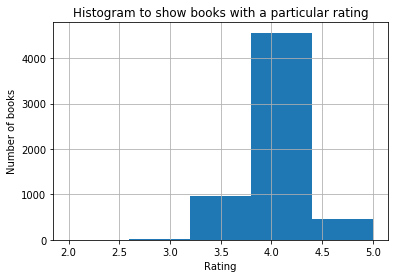

In [19]:
# Generate histograms using the format df.YOUR_CHOICE_OF_COLUMN_NAME.hist(bins=YOUR_CHOICE_OF_BIN_SIZE)
####### 
#   Insert your code
df.rating.hist(bins=5)
####### 

plt.xlabel('Rating')
plt.ylabel('Number of books')
plt.title('Histogram to show books with a particular rating')

plt.show()

Sometimes, the parameters chosen don't produce useful graphs. Go ahead and vary those parameters until the histograms make sense.

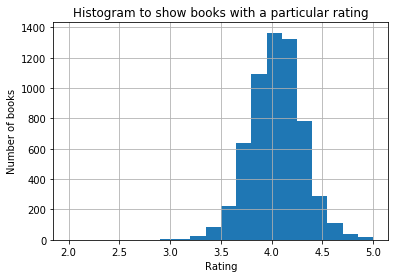

In [20]:
# Generate histograms using the format df.YOUR_CHOICE_OF_COLUMN_NAME.hist(bins=YOUR_CHOICE_OF_BIN_SIZE)
# Be sure to vary the parameters, e.g. bin size, in order to produce useful graphs
####### 
#   Insert your code
df.rating.hist(bins=20)
####### 

plt.xlabel('Rating')
plt.ylabel('Number of books')
plt.title('Histogram to show books with a particular rating')

plt.show()

In [21]:
################### testing code here

In [22]:
df_selected_columns=df[['rating','review_count','year','author','rating_count','name', 'genres']]
#df_selected_columns[:5]

In [23]:
df_max_review_count = df_selected_columns.groupby('year')['review_count'].transform(max) == df_selected_columns['review_count']
#df_selected_columns[df_max_review_count]

In [24]:
df_max_rating_count = df_selected_columns.groupby('year')['rating_count'].transform(max) == df_selected_columns['rating_count']
#df_selected_columns[df_max_rating_count]

In [25]:
df_max_rating = df_selected_columns.groupby('year')['rating'].transform(max) == df_selected_columns['rating']

In [26]:
#df_selected_columns[df_max_rating].sort_values(by=['year','rating'],ascending=False).head(20)

In [27]:
##############################testing code ends here. 

### Finding the best books

Pandas is a great framework for analyzing datasets. It includes many useful features that allows for taking different view on the data. For example, the groupby function of a dataframe allows for grouping the data by one of the features (columns). This is an example of analyzing the dataset by a "grouped property" type.

For the goodreads dataset, use the groupby feature to find the "best book" by year. Think about what it means to be the "best book" and use it to determine the best book by year.

In [28]:
# Using .groupby, we can divide the dataframe into subsets by the values of 'year'.
# The groupby function returns an iterator that can be used to iterate through the
# dataset and calculate over the subsets. Save the results into a new dataframe with
# one column for year and one column for book of the year and print the first few records
# of the dataset.
new_dataframe_book_of_year_by_rating = pd.DataFrame(columns=('year','name'))
for year, subset in df.groupby('year'):
    # Find the best book of the year
    ####### 
    #   Insert your code
    df_temp = pd.DataFrame(subset[subset['rating'].max()==subset['rating']])
    new_dataframe_book_of_year_by_rating = new_dataframe_book_of_year_by_rating.append(df_temp[['year','name']],ignore_index=True)
new_dataframe_book_of_year_by_rating.tail()
    #######

,year,name
297,2012,Patience's Love
298,2012,Abstraction In Theory - Laws Of Physical Trans...
299,2013,Blade Heart
300,2014,An Elephant Is On My House
301,2014,"Untainted (Photographer Trilogy, #3)"


Do this for other definitions of "best book" using the groupby dataframe function, e.g. find the best book by author, define best book by review count, etc.

### Using rating_count

In [29]:

new_dataframe_book_of_year_by_rating_count = pd.DataFrame(columns=('year','name'))
for year, subset in df.groupby('year'):
    # Find the best book of the year
    ####### 
    #   Insert your code
    df_temp1 = pd.DataFrame(subset[subset['rating_count'].max()==subset['rating_count']])
    new_dataframe_book_of_year_by_rating_count = new_dataframe_book_of_year_by_rating_count.append(df_temp1[['year','name']],ignore_index=True)
new_dataframe_book_of_year_by_rating_count.tail(5)
    #######

,year,name
289,2010,"Mockingjay (The Hunger Games, #3)"
290,2011,"Divergent (Divergent, #1)"
291,2012,The Fault in Our Stars
292,2013,"Allegiant (Divergent, #3)"
293,2014,"City of Heavenly Fire (The Mortal Instruments,..."


### Using most review_count

In [30]:
new_dataframe_book_of_year_by_review_count = pd.DataFrame(columns=('year','name'))
for year, subset in df.groupby('year'):
    # Find the best book of the year
    ####### 
    #   Insert your code
    df_temp2 = pd.DataFrame(subset[subset['review_count'].max()==subset['review_count']])
    new_dataframe_book_of_year_by_review_count = new_dataframe_book_of_year_by_review_count.append(df_temp2[['year','name']],ignore_index=True)
new_dataframe_book_of_year_by_review_count.tail(5)
    #######

,year,name
289,2010,"Mockingjay (The Hunger Games, #3)"
290,2011,"Divergent (Divergent, #1)"
291,2012,The Fault in Our Stars
292,2013,"Allegiant (Divergent, #3)"
293,2014,"City of Heavenly Fire (The Mortal Instruments,..."


### Trends in the data

Thinking about the previous example of using groupby, we can take a look at trends in the data. For example, we can try to answer the following questions:
1. Which is the most popular genre in any give month?
2. What's the overall most popular genre?
3. What conclusions can be drawn about the popularity of genres over time?

To answer these questions, we first need to find the unique genres in the dataset. Recall that each genre string is a pipe (|) separated list of genres. We'll start by identifying if the genre string is indeed a pipe separated list. If it is, we return True, otherwise we return False. Then, we can parse those pip separated genre strings into the individual genres and add them to a python set (python sets only contain unique elements, regardless of how many times an element is added to the set). We can return the set once we've iterated through the entire dataframe.

In [31]:
# Return the unique genres contained in the dataframe.
####### 
#   Insert your code
def get_genre(mystring):
        List1 = mystring.split('|')
        for Item in List1:
            if Item == "":
                pass
            else:
                set_temp.add(Item)

set_temp = set()
for index, row in df.iterrows():
    get_genre(row['genres'])
    
#set_temp
new_genre = pd.DataFrame(set_temp,columns=['genre'])
new_genre.head()
####### 

,genre
0,food-history
1,new-weird
2,childrens
3,poverty
4,catholic


Can we add a column to the dataframe for each genre? Is this way of representing genre efficient? Does it allows for easy computation and visualization? Are there alternative ways to represent the genre information that allow for easy visualization?

Yes, we can add a column for each dataframe. 
The processing takes a while and also increases the number of columns a lot. 

Even though this can provide details around counts and occurances, we are researching about the use of heatmap and word cloud to see if the representations are easier to understand and convey more useful information. 



In [32]:
# Add a column to the dataframe for each genre
####### 
#   Insert your code
for index, row in new_genre.iterrows():  
    new_col = "genre_" + row['genre']
    test = row['genre']
    df[new_col]=''
    
    for index, row in df.iterrows():
        set_temp = set()
        get_genre(row['genres'])
        df.at[index,new_col]=(test in set_temp)
####### 

# check the size of the new dataframe
df.shape

(5998, 550)

In [33]:
df.head()

,rating,review_count,isbn,booktype,author_url,year,genre_urls,dir,rating_count,name,author,genres,genre_food-history,genre_new-weird,genre_childrens,genre_poverty,genre_catholic,genre_noir,genre_teachers,genre_fat-acceptance,genre_nutrition,genre_ancient,genre_read-for-school,genre_aliens,genre_atheism,genre_realistic-fiction,genre_m-m-romance,genre_african-american-literature,genre_sequential-art,genre_academic,genre_romania,genre_canada,genre_x-men,genre_art-history,genre_walking,genre_african-american,genre_turkish,genre_canadian-literature,genre_soldiers,genre_greek-mythology,genre_counter-culture,genre_art,genre_angels,genre_lds,genre_boarding-school,genre_mystery-thriller,genre_action,genre_faith,genre_comics-manga,genre_philosophy,...,genre_politics,genre_historical-mystery,genre_urbanism,genre_business,genre_high-school,genre_civil-war,genre_teen,genre_romantic-suspense,genre_gardening,genre_spy-thriller,genre_management,genre_contemporary-romance,genre_spanish-literature,genre_clean-romance,genre_wicca,genre_games,genre_iran,genre_non-fiction,genre_teaching,genre_government,genre_scripture,genre_dragonlance,genre_book-club,genre_interracial-romance,genre_family,genre_sports-romance,genre_speculative-fiction,genre_modern-classics,genre_hungary,genre_magic,genre_science,genre_17th-century,genre_paganism,genre_islam,genre_france,genre_vegan,genre_magical-realism,genre_academia,genre_young-adult-historical-fiction,genre_latin-american-literature,genre_dying-earth,genre_sustainability,genre_novels,genre_photography,genre_books-about-books,genre_ireland,genre_science-fiction,genre_fiction,genre_shojo,genre_short-story-collection
0,4.40,136455,0439023483,good_reads:book,https://www.goodreads.com/author/show/153394.S...,2008,/genres/young-adult|/genres/science-fiction|/g...,dir01/2767052-the-hunger-games.html,2958974,"The Hunger Games (The Hunger Games, #1)",Suzanne_Collins,young-adult|science-fiction|dystopia|fantasy|s...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
1,4.41,16648,0439358078,good_reads:book,https://www.goodreads.com/author/show/1077326....,2003,/genres/fantasy|/genres/young-adult|/genres/fi...,dir01/2.Harry_Potter_and_the_Order_of_the_Phoe...,1284478,Harry Potter and the Order of the Phoenix (Har...,J_K_Rowling,fantasy|young-adult|fiction|fantasy|magic|chil...,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
2,3.56,85746,0316015849,good_reads:book,https://www.goodreads.com/author/show/941441.S...,2005,/genres/young-adult|/genres/fantasy|/genres/ro...,dir01/41865.Twilight.html,2579564,"Twilight (Twilight, #1)",Stephenie_Meyer,young-adult|fantasy|romance|paranormal|vampire...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,

In [34]:
# Review the newly added columns
df.iloc[:, 12:].head()

,genre_food-history,genre_new-weird,genre_childrens,genre_poverty,genre_catholic,genre_noir,genre_teachers,genre_fat-acceptance,genre_nutrition,genre_ancient,genre_read-for-school,genre_aliens,genre_atheism,genre_realistic-fiction,genre_m-m-romance,genre_african-american-literature,genre_sequential-art,genre_academic,genre_romania,genre_canada,genre_x-men,genre_art-history,genre_walking,genre_african-american,genre_turkish,genre_canadian-literature,genre_soldiers,genre_greek-mythology,genre_counter-culture,genre_art,genre_angels,genre_lds,genre_boarding-school,genre_mystery-thriller,genre_action,genre_faith,genre_comics-manga,genre_philosophy,genre_womens,genre_graphic-novels-comics,genre_outdoors,genre_culinary,genre_hinduism,genre_gothic,genre_video-games,genre_polish-literature,genre_lesbian,genre_neuroscience,genre_literary-fiction,genre_love,...,genre_politics,genre_historical-mystery,genre_urbanism,genre_business,genre_high-school,genre_civil-war,genre_teen,genre_romantic-suspense,genre_gardening,genre_spy-thriller,genre_management,genre_contemporary-romance,genre_spanish-literature,genre_clean-romance,genre_wicca,genre_games,genre_iran,genre_non-fiction,genre_teaching,genre_government,genre_scripture,genre_dragonlance,genre_book-club,genre_interracial-romance,genre_family,genre_sports-romance,genre_speculative-fiction,genre_modern-classics,genre_hungary,genre_magic,genre_science,genre_17th-century,genre_paganism,genre_islam,genre_france,genre_vegan,genre_magical-realism,genre_academia,genre_young-adult-historical-fiction,genre_latin-american-literature,genre_dying-earth,genre_sustainability,genre_novels,genre_photography,genre_books-about-books,genre_ireland,genre_science-fiction,genre_fiction,genre_shojo,genre_short-story-collection
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
1,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
3,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Fal

In [35]:
# Verifying results with previous output. 
#df.loc[:, ['genres', 'genre_young-adult']].head(10)

Go ahead and create some visualizations of the genres in the dataset, e.g., create a visualization that allows for us to identify which is the most represented genre.

In [36]:
# Lets only take the new genre columns. 
df_genre = df.iloc[:, 12:]

In [37]:
df_genre.describe()

,genre_food-history,genre_new-weird,genre_childrens,genre_poverty,genre_catholic,genre_noir,genre_teachers,genre_fat-acceptance,genre_nutrition,genre_ancient,genre_read-for-school,genre_aliens,genre_atheism,genre_realistic-fiction,genre_m-m-romance,genre_african-american-literature,genre_sequential-art,genre_academic,genre_romania,genre_canada,genre_x-men,genre_art-history,genre_walking,genre_african-american,genre_turkish,genre_canadian-literature,genre_soldiers,genre_greek-mythology,genre_counter-culture,genre_art,genre_angels,genre_lds,genre_boarding-school,genre_mystery-thriller,genre_action,genre_faith,genre_comics-manga,genre_philosophy,genre_womens,genre_graphic-novels-comics,genre_outdoors,genre_culinary,genre_hinduism,genre_gothic,genre_video-games,genre_polish-literature,genre_lesbian,genre_neuroscience,genre_literary-fiction,genre_love,...,genre_politics,genre_historical-mystery,genre_urbanism,genre_business,genre_high-school,genre_civil-war,genre_teen,genre_romantic-suspense,genre_gardening,genre_spy-thriller,genre_management,genre_contemporary-romance,genre_spanish-literature,genre_clean-romance,genre_wicca,genre_games,genre_iran,genre_non-fiction,genre_teaching,genre_government,genre_scripture,genre_dragonlance,genre_book-club,genre_interracial-romance,genre_family,genre_sports-romance,genre_speculative-fiction,genre_modern-classics,genre_hungary,genre_magic,genre_science,genre_17th-century,genre_paganism,genre_islam,genre_france,genre_vegan,genre_magical-realism,genre_academia,genre_young-adult-historical-fiction,genre_latin-american-literature,genre_dying-earth,genre_sustainability,genre_novels,genre_photography,genre_books-about-books,genre_ireland,genre_science-fiction,genre_fiction,genre_shojo,genre_short-story-collection
count,5998,5998,5998,5998,5998,5998,5998,5998,5998,5998,5998,5998,5998,5998,5998,5998,5998,5998,5998,5998,5998,5998,5998,5998,5998,5998,5998,5998,5998,5998,5998,5998,5998,5998,5998,5998,5998,5998,5998,5998,5998,5998,5998,5998,5998,5998,5998,5998,5998,5998,...,5998,5998,5998,5998,5998,5998,5998,5998,5998,5998,5998,5998,5998,5998,5998,5998,5998,5998,5998,5998,5998,5998,5998,5998,5998,5998,5998,5998,5998,5998,5998,5998,5998,5998,5998,5998,5998,5998,5998,5998,5998,5998,5998,5998,5998,5998,5998,5998,5998,5998
unique,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
top,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
freq,5997,5994,5275,5994,5988,5972,5997,5997,5996,5974,5879,5944,5984,5613,5963,5993,5868,5552,5997,5935,5997,5992,5997,5957,5990,5987,5997,5955,5995,5957,5877,5977,5990,5743,5820,5951,5981,5620,5957,5932,5993,5997,5994,5893,5997,5984,5989,5993,5573,5857,...,5843,5988,5997,5957,5849,5983,5294,5944,5996,5941,5989,5681,5942,5996,5996,5993,5984,5407,5990,5992,5997,5992,5079,5997,5880,5986,5857,5973,5993,5242,5901,5991,5997,5968,5855,5996,5875,5996,5991,5974,5997,5997,4511,5996,5970,5958,5017,4364,5990,5996


In [38]:
# Checking the number of times a genre appeared. 
df_genre_count = pd.DataFrame(df_genre.apply(pd.Series.value_counts).T)
df_genre_count.columns = ['False','count']
df_genre_count[:5]

,False,count
genre_food-history,5997,1
genre_new-weird,5994,4
genre_childrens,5275,723
genre_poverty,5994,4
genre_catholic,5988,10


In [39]:
# We only needed the count column as this field specifies when does the book is classified with this genre. 
# So we select only the cound field and put it in a temporary dataframe
df_temp = pd.DataFrame(df_genre_count['count'])
# We look at the minimum and maximum values for count
df_temp.describe()

,count
count,538.000000
mean,109.594796
std,331.504054
min,1.000000
25%,3.000000
50%,12.000000
75%,59.750000
max,4364.000000


In [40]:
# Now let us check the top 10 genres
df_top_genres = df_temp.sort_values('count',ascending=False).head(10)
df_top_genres

,count
genre_fiction,4364
genre_fantasy,2744
genre_romance,2229
genre_young-adult,2133
genre_literature,1609
genre_classics,1584
genre_novels,1487
genre_contemporary,1309
genre_adult,1211
genre_paranormal,1202


Text(0, 0.5, 'Count')

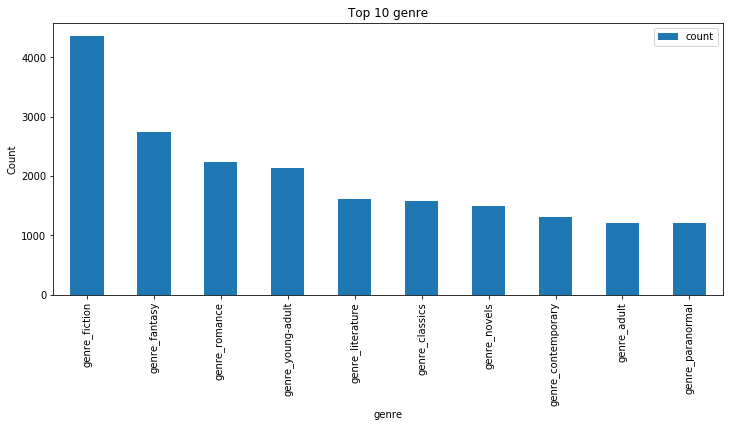

In [41]:
# Plot a bar graph for the top genre
plt_bar=df_top_genres.plot.bar(figsize=(12,5),title='Top 10 genre')
plt_bar.set_xlabel("genre")
plt_bar.set_ylabel("Count")


This tells us that fiction is the most common genre followed by fantasy and romance. 

## Conclusions

Pick three genres and describe how the popularity of these genres fluctuates with time. Go ahead and produce a time series representation of the genre popularity to aid in your description.

In [42]:
# Select year and three genre - fiction, classics, fantasy for our analysis.
df_genre_year=df[['year','genre_fiction','genre_classics','genre_fantasy']]

In [43]:
# Check our dataframe by reviewing top 5
df_genre_year.head()

,year,genre_fiction,genre_classics,genre_fantasy
0,2008,False,False,True
1,2003,True,False,True
2,2005,True,False,True
3,1960,True,True,False
4,1813,True,True,False


In [44]:
# Set index to year and check top 5
df_genre_year.set_index('year').head()

,genre_fiction,genre_classics,genre_fantasy
year,,,
2008,False,False,True
2003,True,False,True
2005,True,False,True
1960,True,True,False
1813,True,True,False


In [45]:
# As dataset in not sorted, sort descending
df_genre_year = df_genre_year.sort_values(by=['year']).set_index('year')

In [46]:
# check our dataset now
df_genre_year.tail()

,genre_fiction,genre_classics,genre_fantasy
year,,,
2014,True,False,True
2014,False,False,False
2014,True,False,False
2014,False,False,False
2014,False,False,False


In [47]:
## Now use groupby to count how many times a genre appeared in a year. We used the sum method to get the counts. 

new_dataframe_genre_by_year = pd.DataFrame()
for year, subset in df_genre_year.groupby('year'):
    new_dataframe_genre_by_year[year]=subset.sum()
#As dataframe is by year, transpose to get correct view
new_dataframe_genre_by_year=new_dataframe_genre_by_year.T


In [48]:
# Set the label for index and check out dataset
new_dataframe_genre_by_year.index.name = 'year'
new_dataframe_genre_by_year.head()

,genre_fiction,genre_classics,genre_fantasy
year,,,
-9999,2.0,0.0,2.0
-1500,0.0,1.0,0.0
-800,1.0,2.0,2.0
-560,1.0,1.0,1.0
-512,0.0,1.0,0.0


Text(0, 0.5, 'genre')

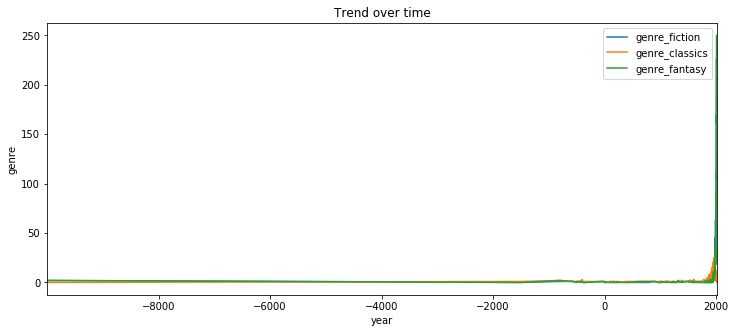

In [49]:
#Plot the graph for all data.
plt_year=new_dataframe_genre_by_year.plot(figsize=(12,5),title='Trend over time')
plt_year.set_xlabel('year')
plt_year.set_ylabel('genre')

By reviewing the plot above, we can see that most of the data is available for the recent years in comparison to older times. It might be beneficial to review data from more recent years to remove skewed data. After reviewing these results, we filtered the data after 1985

In [50]:
# filter dataset and asssign to a new dataset new_dataframe_genre_by_year_filtered 
new_dataframe_genre_by_year_filtered = new_dataframe_genre_by_year[new_dataframe_genre_by_year.index > 1985]

Text(0, 0.5, 'genre')

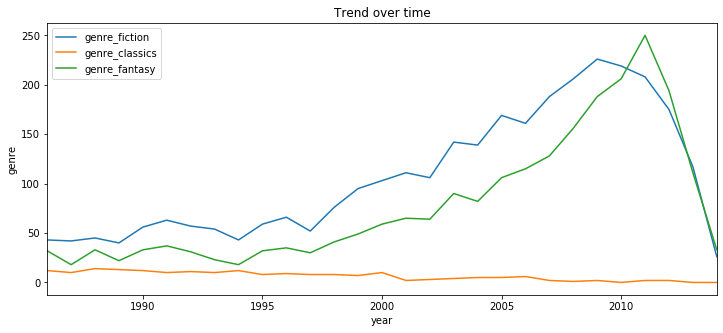

In [51]:
# Create a line plot for the selected genre over time. 

plt_year=new_dataframe_genre_by_year_filtered.plot(figsize=(12,5),title='Trend over time')
plt_year.set_xlabel('year')
plt_year.set_ylabel('genre')